## Imports

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,roc_curve

## Cargar los datos

In [40]:
df1=pd.read_csv(r"C:\Users\Usuario\Dropbox\Biomed\4\SIEB\Proyecto\trabajo_SIEB_1.csv", usecols=["col_1","col_2","col_3","col_4","col_5","col_6","col_7"])
df2=pd.read_csv(r"C:\Users\Usuario\Dropbox\Biomed\4\SIEB\Proyecto\trabajo_SIEB_2.csv", usecols=["col_1","col_2","col_3","col_4","col_5","col_6","col_7"])
df_train=pd.concat([df1,df2],axis=0)
#df_test=pd.read_csv("C:/Users/Usuario/Dropbox/Biomed/4/SIEB/Proyecto/trabajo_SIEB_2.csv", usecols=["col_1","col_2","col_3","col_4","col_5","col_6","col_7"])

## Limpiar y preparar los datos

##### Datos de entrenamiento

In [41]:
#Eliminar outliers
Q1=df_train.quantile(0.25)
Q3=df_train.quantile(0.75)
IQR=Q3-Q1

upper=df_train>(Q3+1.5*IQR)
lower=df_train<(Q1-1.5*IQR)

df_train=df_train[~(upper|lower).any(axis=1)]

#Sustituir valores vacios por la media
df_train=df_train.fillna(df_train.mean()) 

#Modificación valores columna 6
df_train['col_6'].replace({'Alto':3,'High':3,'Medio':2,'Medium':2,'Bajo':1,'Low':1}, inplace=True)
df_train=pd.get_dummies(df_train, columns=['col_6'],prefix_sep=['.'])

#Modificar valores columna 7
df_train['col_7'].replace({'Sí':1,'No':0}, inplace=True)

#Eliminar valores duplicados
df_train.drop_duplicates(inplace=True)

#Separar resultados de datos
data_train=df_train.drop(['col_7'],axis=1) 
y_train=df_train['col_7']

#Estandarizar valores de datos
x_train=data_train.astype(float)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

'''Usar solo para estudio alumno'''
#Crear test
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)
'''Usar solo para estudio alumno'''

#Reducir dimensiones PCA
pca=PCA(n_components=5) 
pca.fit(x_train)
x_pca_train=pca.transform(x_train)

'''Usar solo para estudio alumno'''
x_pca_test=pca.transform(x_test)
'''Usar solo para estudio alumno'''

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13140\2597202588.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df_train.quantile(0.25)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13140\2597202588.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df_train.quantile(0.75)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13140\2597202588.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper=df_train>(Q3+1.5*IQR)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_

'Usar solo para estudio alumno'

##### Datos de test

In [42]:
# #Modificación valores columna 6
# df_test['col_6'].replace({'Alto':3,'High':3,'Medio':2,'Medium':2,'Bajo':1,'Low':1}, inplace=True)
# df_test=pd.get_dummies(df_test, columns=['col_6'],prefix_sep=['.'])

# #Modificar valores columna 7
# df_test['col_7'].replace({'Sí':1,'No':0}, inplace=True)

# #Separar resultados de datos
# data_test=df_train.drop(['col_7'],axis=1) 
# y_test=df_train['col_7']

# #Estandarizar valores de datos
# x_test=data_test.astype(float)
# x_test=sc.fit_transform(x_test)

# #Reducir dimensiones PCA
# x_pca_test=pca.transform(x_test)

## Entrenamiento algoritmo

In [43]:
grid = SVC(C=650, gamma=0.15, kernel='rbf',probability=True) 
grid.fit(x_pca_train, y_train);

## Analizar datos de test con el algoritmo

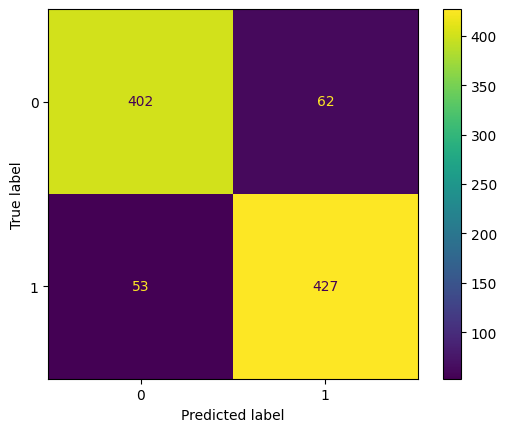

In [44]:
y_pred=grid.predict(x_pca_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot();

VALORES DE LAS METRICAS:
	Exactitud: 87.82%
	Precisión: 87.32%
	Sensibilidad: 88.96%
	Especificidad: 87.32%
	F1: 88.13%




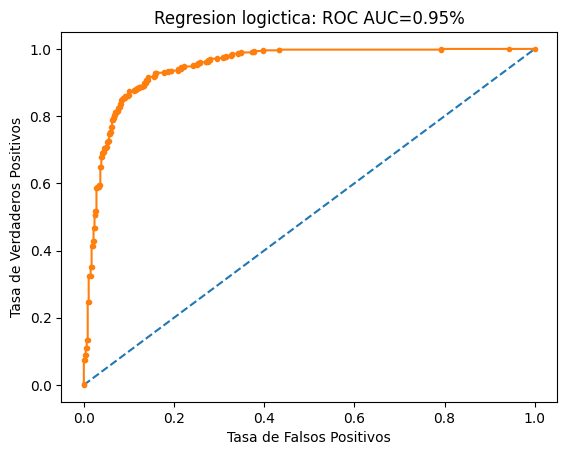

In [45]:
exac=metrics.accuracy_score(y_test,y_pred)*100
prec=metrics.precision_score(y_test,y_pred)*100
sens=metrics.recall_score(y_test,y_pred)*100
espec=cm[1,1]/(cm[1,1]+cm[0,1])*100
f1=metrics.f1_score(y_test,y_pred)*100

print('VALORES DE LAS METRICAS:\n\tExactitud: {:.2f}%\n\tPrecisión: {:.2f}%\n\tSensibilidad: {:.2f}%\n\tEspecificidad: {:.2f}%\n\tF1: {:.2f}%\n\n'.format(exac,prec,sens,espec,f1))

ns=[0 for _ in range(len(y_test))]
y_roc=grid.predict_proba(x_pca_test)

ns_auc=roc_auc_score(y_test,ns)
lr_auc=roc_auc_score(y_test,y_roc[:,1])

ns_fpr,ns_tpr,_=roc_curve(y_test,ns)
lr_fpr,lr_tpr,_=roc_curve(y_test,y_roc[:,1])

plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Regresion logictica: ROC AUC={:.2f}%'.format(lr_auc))
plt.show()